In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import normalize
from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


df = pd.read_csv('../QualidadeAgua\waterQuality1.csv')
df.replace("#NUM!", pd.NA, inplace=True) #significa que a modificação será feita diretamente no próprio DataFrame, sem a necessidade de atribuí-lo novamente a uma variável.
df = df.dropna()

Y = df['is_safe']
X = df.drop(['is_safe'], axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 42)



<>:12: SyntaxWarning: invalid escape sequence '\w'
<>:12: SyntaxWarning: invalid escape sequence '\w'
C:\Users\disrct\AppData\Local\Temp\ipykernel_15756\3991409993.py:12: SyntaxWarning: invalid escape sequence '\w'
  df = pd.read_csv('../QualidadeAgua\waterQuality1.csv')


In [ ]:
#Decision Tree Classifier

model = DecisionTreeClassifier(
criterion = "entropy",
max_depth=20,
min_samples_split=10
)

In [4]:
#Decision Tree Classifier whit GridSearchCV

parametros = {
    'max_depth': [5, 10, 20, 50, 200],# Quantidade máxima de níveis na árvore
    'min_samples_split': [5, 10],# Número mínimo de amostras necessárias para dividir um nó
    'criterion': ["entropy"]

}

# max_depth: Controla a profundidade máxima da árvore de decisão. 
#     Árvores muito profundas podem superajustar (overfitting), enquanto árvores muito rasas podem subajustar (underfitting).
# min_samples_split: Define o número mínimo de amostras que um nó precisa ter para poder ser dividido em dois.
#     Se for muito alto, a árvore não cresce muito; se for muito baixo, a árvore pode crescer demais e se tornar complexa.

dtc = DecisionTreeClassifier()

model = GridSearchCV(
    estimator = dtc,
    param_grid= parametros, 
    cv=5,  # 5-fold cross-validation
    scoring='accuracy'

)




Acurácia no treino: 0.985285462036492
Acurácia no teste: 0.9533333333333334

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1047
           1       0.87      0.75      0.80       153

    accuracy                           0.95      1200
   macro avg       0.92      0.86      0.89      1200
weighted avg       0.95      0.95      0.95      1200


Matriz de Confusão:


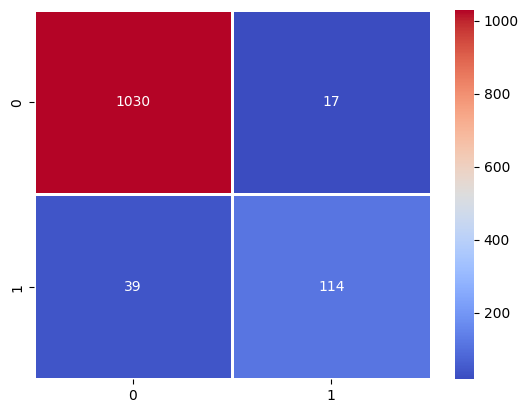

In [6]:
model.fit(X_train, Y_train)


Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

accuracy_train = accuracy_score(Y_train, Y_train_pred)
accuracy_test = accuracy_score(Y_test, Y_test_pred)

# Exibir resultados
print(f'Acurácia no treino: {accuracy_train}')
print(f'Acurácia no teste: {accuracy_test}')

# Exibir relatório de classificação
print("\nRelatório de Classificação (Teste):")
print(classification_report(Y_test, Y_test_pred))

# Exibir matriz de confusão
print("\nMatriz de Confusão:")
cf_matrix = confusion_matrix(Y_test, Y_test_pred)
sns.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()